## Assignment 3: Decision Tree
#### Name : Atharv Subhekar
#### CWID : 20015840


In [67]:
#import preprocessing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#algorithm libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

#Metrics libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

### Data Preprocessing

In [68]:
data = pd.read_csv('Titanic.csv')
data

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


In [69]:
# Storing the target labels
target = data['survived']
# Storing needed columns from the data
features = data.drop(columns = ['Unnamed: 0','survived','name','parch','ticket','fare','cabin','embarked','boat','body','home.dest'])

During data preprocessing, I found several NaN values which I replaced with the mean values in that column. This gave me better result than just randomly filling the data in those locations.

In [70]:
# Fill all the null values with the mean of that column
features['age'].fillna(features['age'].mean(), inplace=True)
# Replacing all the female and male entries with 1 and -1 to fit the model
features['sex'].replace('female', -1, inplace = True)
features['sex'].replace('male', 1, inplace = True)
# Replacing all the pclass entries with integers 1,2,3
features['pclass'].replace('1st', 1, inplace = True)
features['pclass'].replace('2nd', 2, inplace = True)
features['pclass'].replace('3rd', 3, inplace = True)

In [71]:
print('Final dataset after pre processing')
features

Final dataset after pre processing


,pclass,sex,age,sibsp
0,1,-1,29.000000,0
1,1,1,0.916700,1
2,1,-1,2.000000,1
3,1,1,30.000000,1
4,1,-1,25.000000,1
...,...,...,...,...
1304,3,-1,14.500000,1
1305,3,-1,29.881135,1
1306,3,1,26.500000,0
1307,3,1,27.000000,0


In [72]:
print('Final target labels after pre processing')
target

Final target labels after pre processing


0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

### Splitting the dataset
Splitting the dataset into 70% training set and 30% testing set.

In [73]:
#Splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3)

In [74]:
print('X_train shape = ',X_train.shape)
print('y_train shape = ',y_train.shape)
print('X_test shape = ',X_test.shape)
print('y_test shape = ',y_test.shape)

X_train shape =  (916, 4)
y_train shape =  (916,)
X_test shape =  (393, 4)
y_test shape =  (393,)


### Decision Tree Classifier

In [103]:
# Initializing the model
decision_tree = tree.DecisionTreeClassifier(random_state = 42)
# Fitting the model on training data
decision_tree.fit(X_train,y_train)
# Predicting the labels values using the test data
y_pred = decision_tree.predict(X_test)
# Evaluating the model
dtree_accuracy = accuracy_score(y_pred, y_test)
# Priting the accuracy of Decision Tree Classifier
print(dtree_accuracy)
print(f'Decision Tree Accuracy: {dtree_accuracy*100:.2f}%')

0.7608142493638677
Decision Tree Accuracy: 76.08%


In [76]:
# Printing the text representation of the tree for understanding
text_representation = tree.export_text(decision_tree)
print(text_representation)

|--- feature_1 <= 0.00
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 56.00
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- feature_2 <= 25.50
|   |   |   |   |   |--- feature_2 <= 24.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  24.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  25.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- feature_2 <= 37.00
|   |   |   |   |   |--- feature_2 <= 28.50
|   |   |   |   |   |   |--- feature_2 <= 18.50
|   |   |   |   |   |   |   |--- feature_2 <= 16.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  16.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  18.50
|   |   |   |   |   |   |   |-

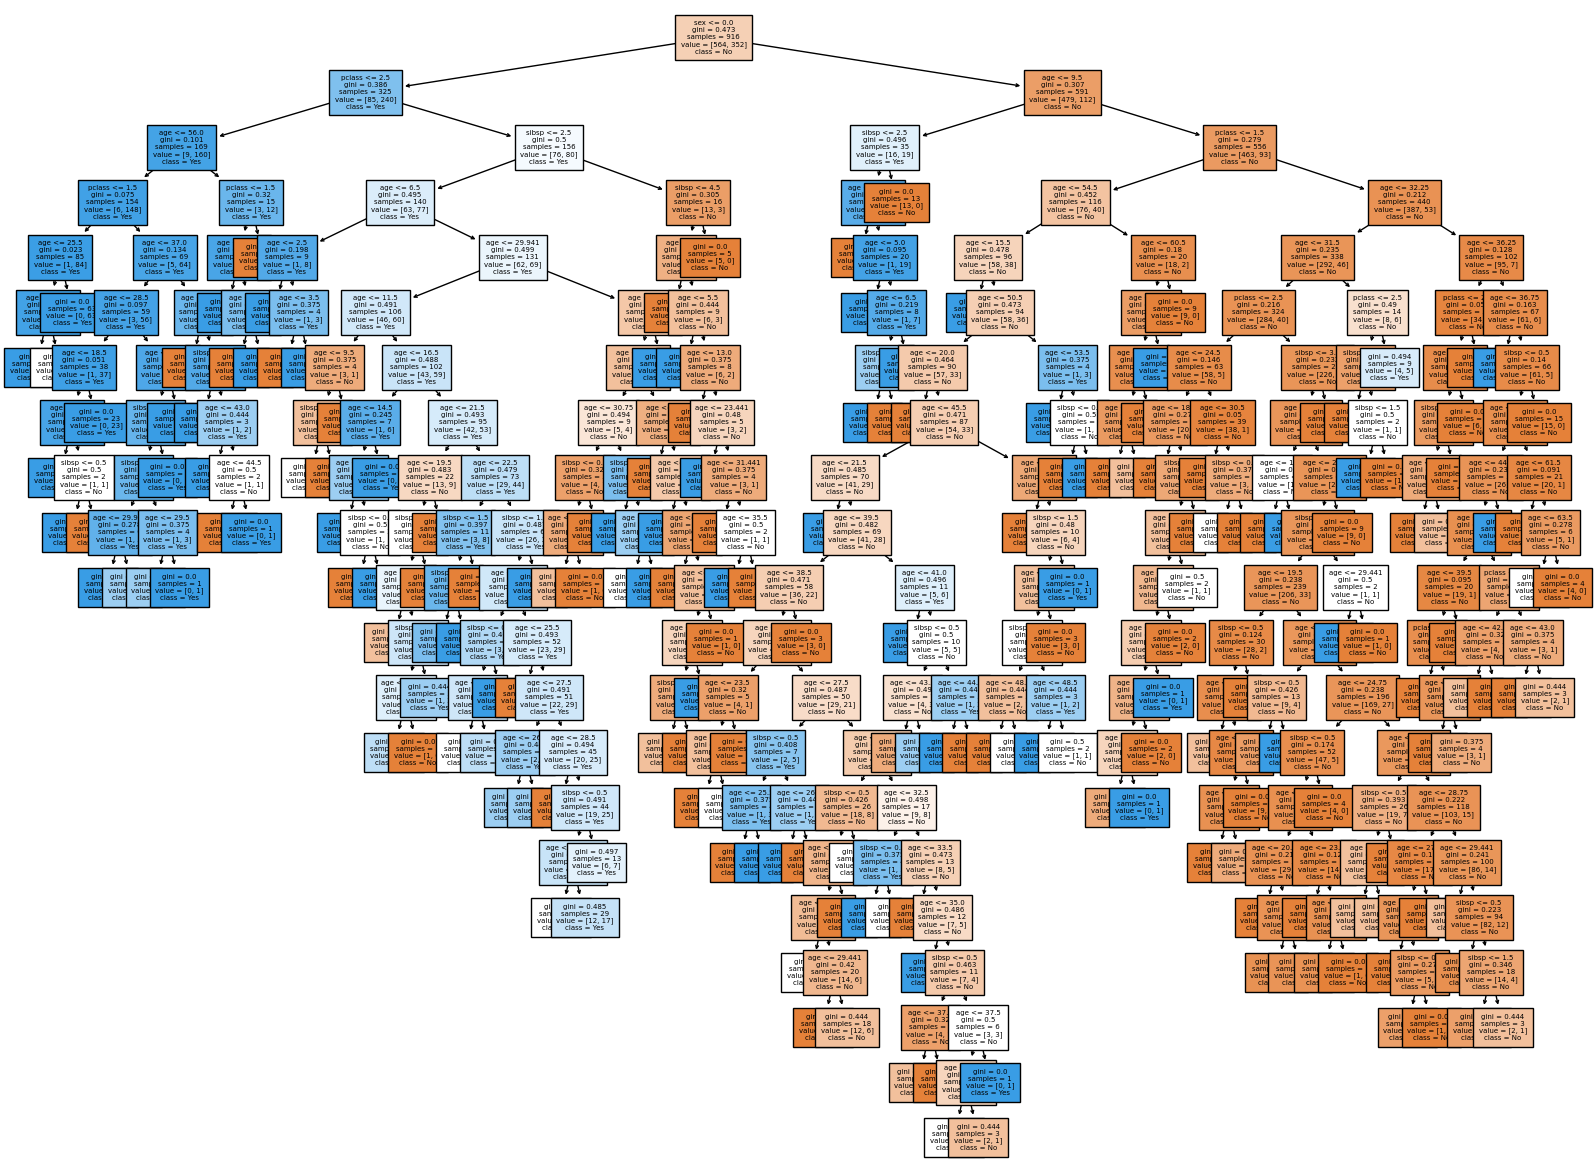

In [77]:
# Plotting the full tree
plt.figure(figsize=(20,15))
tree.plot_tree(decision_tree,feature_names=X_train.columns, class_names=['No', 'Yes'],fontsize=5,filled=True)
plt.show()

### Grid Search Cross Validation
We will be using grid search cross validation to find the best parameters of tree nodes and check over accuracy.

In [94]:
# Setting the parameters to optimize using grid search CV
param_grid = {'max_leaf_nodes': [None, 2, 3,4,5,6,7,8,9]}
# Initializing grid search CV
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
# Fitting grid search CV on training data
grid_search.fit(X_train, y_train)
# Priting best parameters based on accuracy score
print(f'Improved score: {grid_search.best_score_*100:.2f}%')
print('Improved parameters: ', grid_search.best_params_)
best_param = grid_search.best_params_['max_leaf_nodes']


Improved score: 80.35%
Improved parameters:  {'max_leaf_nodes': 9}


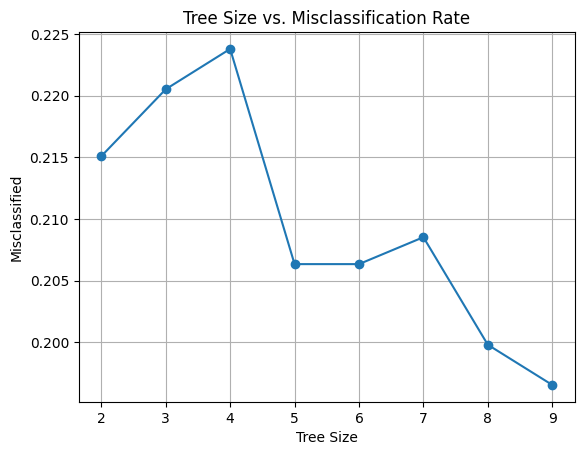

In [89]:
# Plot the graph
plt.figure()
plt.plot(max_depth, 1-results['mean_test_score'], marker='o', linestyle='-')
plt.xlabel("Tree Size")
plt.ylabel("Misclassified")
plt.title("Tree Size vs. Misclassification Rate")
plt.grid(True)
plt.show()

I tried calculating the number of misclassifications by manually passing all the parameters. But the achieved plot is a little different since in GridSearch CV, we are using small batches for cross validation. In this case we used 5 batches.
If we use K fold cross validation followed by Decision Tree Classifier we might get closer output. But finally it comes down to the shuffling of data elements during the process.
In general, the plot show the same trend and are approximately correct.

In [97]:
# To plot a graph for misclassified elements vs tree size.
# Creating a list of parameters (max_leaf_nodes)
max_depth = param_grid['max_leaf_nodes']
# Creating a list to store the number of misclassified elements using all combinations of parameters.
misclassed = []
# Looping through all the parameters manually to store the wrong predictions
for size in max_depth:
  count = 0
  dtree_sizewise = DecisionTreeClassifier(random_state = 42, max_leaf_nodes=size)
  dtree_sizewise.fit(X_train,y_train)
  y_pred = dtree_sizewise.predict(X_train)
  # Checking for correct predictions using boolean flags
  predictions = (y_pred==y_train)
  # Counting the number of False flags
  for pred in predictions:
    if pred == False:
      count+=1
  # Appending all the counts in a list.
  misclassed.append(count)


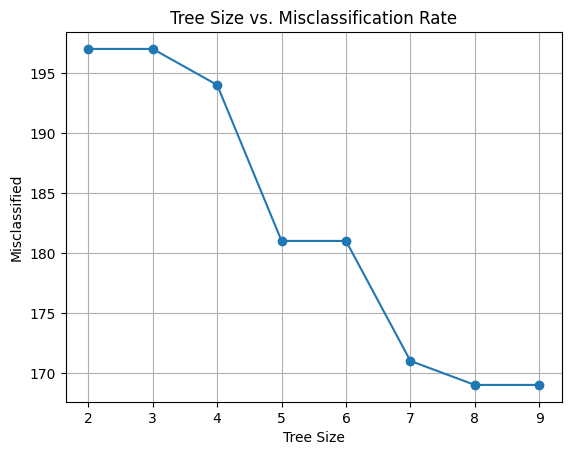

In [98]:
# Plot the graph
plt.figure()
plt.plot(max_depth, misclassed, marker='o', linestyle='-')
plt.xlabel("Tree Size")
plt.ylabel("Misclassified")
plt.title("Tree Size vs. Number of Missclassifications")
plt.grid(True)
plt.show()

### Decision Tree Classifier using the best parameters.

In [113]:
# Initializing the model
decision_tree_optimized = tree.DecisionTreeClassifier(max_leaf_nodes=best_param)
# Fitting the model on training data
decision_tree_optimized.fit(X_train,y_train)
# Predicting the labels values using the test data
y_pred = decision_tree_optimized.predict(X_test)
# Evaluating the model
dtreeopt_accuracy = accuracy_score(y_pred, y_test)
# Priting the accuracy of Decision Tree Classifier
print(f'Optimized Decision Tree Accuracy: {dtreeopt_accuracy *100:.2f}%')

Optimized Decision Tree Accuracy: 80.15%


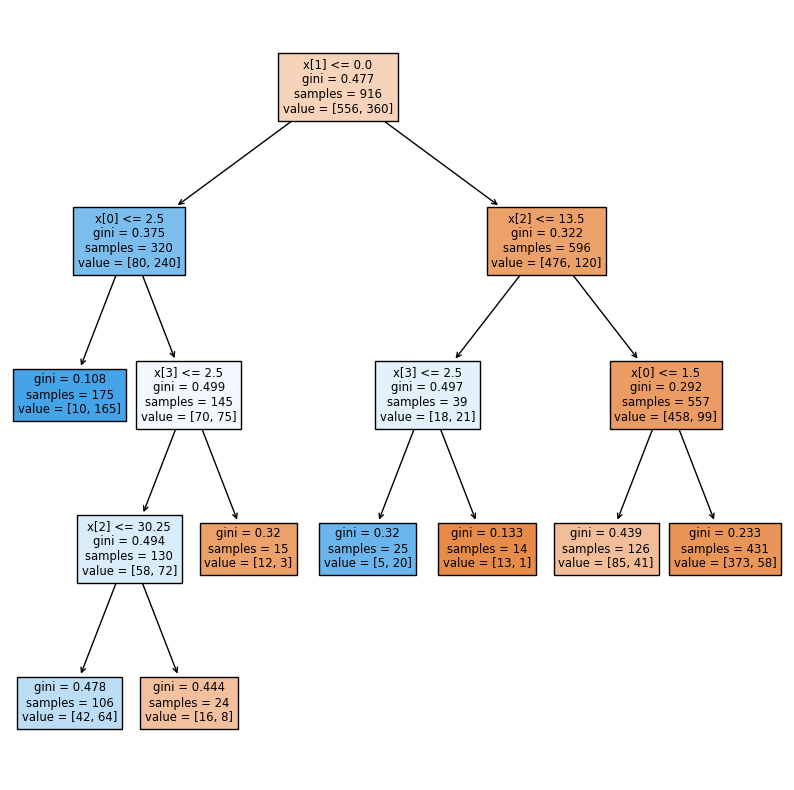

In [85]:
# Plotting the pruned tree
plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree_optimized,filled=True)
plt.show()

In [86]:
# Report percent survivors and fatalities correctly predicted on the test set
predictions = decision_tree_optimized.predict(X_test)
survivors_correct = np.sum((predictions == 1) & (y_test == 1))
fatalities_correct = np.sum((predictions == 0) & (y_test == 0))
total_survivors = np.sum(y_test == 1)
total_fatalities = np.sum(y_test == 0)

percent_survivors_correct = (survivors_correct / total_survivors) * 100
percent_fatalities_correct = (fatalities_correct / total_fatalities) * 100

print(f'Percent survivors correctly predicted: {percent_survivors_correct:.2f}%')
print(f'Percent fatalities correctly predicted: {percent_fatalities_correct:.2f}%')

Percent survivors correctly predicted: 72.86%
Percent fatalities correctly predicted: 84.58%


### Random Forest Classifier


In [101]:
random_forest = RandomForestClassifier(n_estimators=50,max_leaf_nodes=best_param)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
# Evaluating the model
rf_accuracy = accuracy_score(y_pred, y_test)
print(f'Optimized Random Forest Accuracy: {rf_accuracy *100:.2f}%')


Optimized Random Forest Accuracy: 79.13%


In [102]:
# Report percent survivors and fatalities correctly predicted on the test set
predictions = random_forest.predict(X_test)
survivors_correct = np.sum((predictions == 1) & (y_test == 1))
fatalities_correct = np.sum((predictions == 0) & (y_test == 0))
total_survivors = np.sum(y_test == 1)
total_fatalities = np.sum(y_test == 0)

percent_survivors_correct = (survivors_correct / total_survivors) * 100
percent_fatalities_correct = (fatalities_correct / total_fatalities) * 100

print(f'Percent survivors correctly predicted: {percent_survivors_correct:.2f}%')
print(f'Percent fatalities correctly predicted: {percent_fatalities_correct:.2f}%')

Percent survivors correctly predicted: 66.22%
Percent fatalities correctly predicted: 86.94%


### Conclusion
After plotting the full decision tree we can observe accuracy of around 76%. After using Grid Search CV, we can find the best number of lead nodes required to get the best accuracy. Using Grid Search CV gave better accuracy compared to unoptmized decision tree.

After optimizing the parameters, we get accuracy around 80% using decision tree. The accuracy of correct predicted suvivors was 72% and correct predicted fatalities was 85%.

We used the same parameters and trained Random Forest Classifier which gave accuracy of around 80%. The accuracy of correct predicted suvivors was 67% and correct predicted fatalities was 87%.

We can conclude that the optimized decision tree parameters do not give better result when used with Random Forest and random forest may perform better if the parameters are optimized separately